In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [ ]:
df = pd.read_csv("Inputs/mnist_train.csv")

In [ ]:
df.describe()

In [ ]:
#how many images of each digit do we have in the dataset

dig = [0,1,2,3,4,5,6,7,8,9]
num = []
for i in range(0,10):
    num.append(len(df[df['label']==i]))
    
d = {'Digit': dig, 'Count': num}
df1 = pd.DataFrame(data=d)
df1

In [ ]:
# how many images of each digit do we have in the dataset

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = 'Count', y = 'Digit', data = df1, orient='h')
plt.show()

In [ ]:
# rows in the dataset do we have images of the digit “3”

df[df['label']==3].head()

In [ ]:
#print the image from row number 6

pic = df[6:7].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

In [66]:
# Data Preparation

X = df.drop(['label'],axis=1)
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Data Preparation

y = df.label
y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [68]:


import sklearn.model_selection as skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=42)
print("length of all data is ","{:,}".format(len(X)))
print("length of training set is","{:,}".format(len(X_train)))
print("length of test set is","{:,}".format(len(X_test)))

length of all data is  60,000
length of training set is 40,200
length of test set is 19,800


In [69]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
25799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train.head()

25799    8
56172    6
7098     9
2602     6
15335    3
Name: label, dtype: int64

In [71]:
x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)
len(X_train)

40200

In [73]:
#Draw a number between 0 to 40199

i = random.randint(0,(len(X_train)))
i

18246

In [75]:
# print the result of the image from row number 34944 in the training set

print(y_train[i])

1


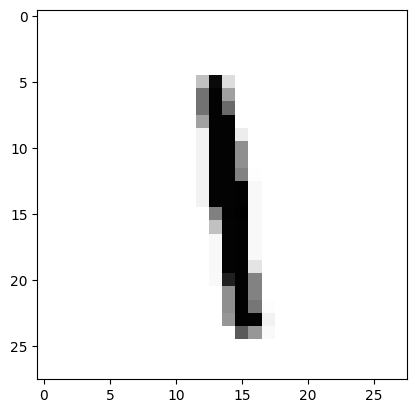

In [77]:
# print the image from row number 18246 in the training set

pic = X_train.iloc[i].values.reshape(28,28)
plt.imshow(pic, cmap='Greys')

In [78]:
x_train.shape

(40200, 784)

In [79]:
# reshape the array to 4-dimnsions so that it can work with the Keras API

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [80]:
#make sure that the values are float so that we can get decimal points after division

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [81]:
#normalize the RGB codes by dividing it to the max RGB value

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (40200, 28, 28, 1)
Number of images in x_train 40200
Number of images in x_test 19800


In [82]:
#3. Modelling
# build a CNN using a Sequential model and adding the layers

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [84]:
#compile our CNN

model.compile(optimizer='adam', 
 loss='sparse_categorical_crossentropy', 
 metrics=['accuracy'])

In [85]:
# train our CNN

model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1257/1257 [==============================] - 30s 23ms/step - loss: 0.2531 - accuracy: 0.9234
Epoch 2/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.1024 - accuracy: 0.9694
Epoch 3/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.0679 - accuracy: 0.9789
Epoch 4/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.0496 - accuracy: 0.9842
Epoch 5/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 6/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0326 - accuracy: 0.9886
Epoch 7/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 8/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0244 - accuracy: 0.9917
Epoch 9/10
1257/1257 [==============================] - 27s 21ms/step - loss: 0.0205 - accuracy: 0.9928
Epoch 10/10
1257/1257 [==============================] - 32s 25m

In [86]:
model.evaluate(x_test, y_test)

619/619 [==============================] - 5s 7ms/step - loss: 0.0886 - accuracy: 0.9796


[0.08860928565263748, 0.9796464443206787]

In [89]:
import sklearn.metrics as skmet
cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
 
 #This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
print('Confusion matrix, without normalization')
print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
 plt.text(j, i, cm[i, j],
 horizontalalignment=”center”,
 color=”white” if cm[i, j] > thresh else “black”)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=’Confusion Matrix’)

SyntaxError: invalid character '’' (U+2019) (2718842563.py, line 10)